# Static Analysis

## Handcrafted

only for binary analysis, not symbolic analysis.

In [1]:
# Get a 32-bit pe file
!wget https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe -O putty32.exe

--2020-04-06 05:57:04--  https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe
Resolving the.earth.li (the.earth.li)... 93.93.131.124, 2a00:1098:86:4d:c0ff:ee:15:900d
Connecting to the.earth.li (the.earth.li)|93.93.131.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://the.earth.li/~sgtatham/putty/0.73/w32/putty.exe [following]
--2020-04-06 05:57:04--  https://the.earth.li/~sgtatham/putty/0.73/w32/putty.exe
Reusing existing connection to the.earth.li:443.
HTTP request sent, awaiting response... 200 OK
Length: 1096080 (1.0M) [application/x-msdos-program]
Saving to: ‘putty32.exe’

putty32.exe         100%[===================>]   1.04M  1.94MB/s    in 0.5s    

2020-04-06 05:57:05 (1.94 MB/s) - ‘putty32.exe’ saved [1096080/1096080]



In [2]:
# Get a 64-bit pe file
!wget https://the.earth.li/~sgtatham/putty/latest/w64/putty.exe -O putty64.exe

--2020-04-06 05:57:08--  https://the.earth.li/~sgtatham/putty/latest/w64/putty.exe
Resolving the.earth.li (the.earth.li)... 93.93.131.124, 2a00:1098:86:4d:c0ff:ee:15:900d
Connecting to the.earth.li (the.earth.li)|93.93.131.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://the.earth.li/~sgtatham/putty/0.73/w64/putty.exe [following]
--2020-04-06 05:57:08--  https://the.earth.li/~sgtatham/putty/0.73/w64/putty.exe
Reusing existing connection to the.earth.li:443.
HTTP request sent, awaiting response... 200 OK
Length: 1179024 (1.1M) [application/x-msdos-program]
Saving to: ‘putty64.exe’

putty64.exe         100%[===================>]   1.12M  2.10MB/s    in 0.5s    

2020-04-06 05:57:09 (2.10 MB/s) - ‘putty64.exe’ saved [1179024/1179024]



In [3]:
!ls -al

total 2240
drwxr-xr-x 1 root root    4096 Apr  6 05:57 .
drwxr-xr-x 1 root root    4096 Apr  6 05:56 ..
drwxr-xr-x 1 root root    4096 Apr  2 16:11 .config
-rw-r--r-- 1 root root 1096080 Sep 22  2019 putty32.exe
-rw-r--r-- 1 root root 1179024 Sep 22  2019 putty64.exe
drwxr-xr-x 1 root root    4096 Mar 18 16:23 sample_data


### EXE file?


In [0]:
def isExe(fp):
    if fp.endswith("exe"):
        return True
    else:
        return False

In [5]:
isExe("/content/putty32.exe")

True

### MZ (DOS) file?

In [0]:
def isMZ(fp):
    with open(fp, 'rb') as hnd:
        if hnd.read(2) == b"MZ":
            return True
        else:
            return False

In [7]:
isMZ("/content/putty32.exe")

True

### PE file?

In [0]:
def isPE(fp):
  try:
    with open(fp, 'rb') as hnd:
      if hnd.read(2) != b"MZ":
        return False
      hnd.seek(0x3c, 0)
      
      import struct
      offset = struct.unpack('<i', hnd.read(4))[0]
      hnd.seek(offset, 0)
      if hnd.read(4) == b"PE\0\0":
        return True
      else:
        print("isMZ, not PE.")
        return False
  except:
    return False

In [9]:
isPE("/content/putty32.exe")

True

### Architecture? (Machine)

In [0]:
def machine(fp):
  try:
    with open(fp, 'rb') as hnd:
      hnd.seek(0x3c, 0)
      
      import struct
      offset = struct.unpack('<i', hnd.read(4))[0]
      hnd.seek(offset, 0)
      hnd.read(4)
      machine = struct.unpack("<H", hnd.read(2))[0]

      if machine == 332: # IMAGE_FILE_MACHINE_I386
        return "IA-32 (32-bit x86)"
      elif machine == 512: #IMAGE_FILE_MACHINE_IA64:
        return "IA-64 (Itanium)"
      elif machine == 34404: #IMAGE_FILE_MACHINE_AMD64:
        return "AMD64 (64-bit x86)"
      else:
        return "Unknown architecture"
  except:
    return "Exception"

In [11]:
machine("/content/putty32.exe")

'IA-32 (32-bit x86)'

In [12]:
machine("/content/putty64.exe")

'AMD64 (64-bit x86)'

### Hex representation

In [0]:
import binascii

def printHex(fp, limit = 64):
  with open(fp, 'rb') as f:
    content = f.read()
    
    i = 0
    for b in content:
      print(format(b, "02x"), " ", end="")
      if i% 8 == 7:
        print("")
      i += 1
      if i == limit:
        break

In [14]:
printHex("/content/putty32.exe", limit = 160)

4d  5a  78  00  01  00  00  00  
04  00  00  00  00  00  00  00  
00  00  00  00  00  00  00  00  
40  00  00  00  00  00  00  00  
00  00  00  00  00  00  00  00  
00  00  00  00  00  00  00  00  
00  00  00  00  00  00  00  00  
00  00  00  00  78  00  00  00  
0e  1f  ba  0e  00  b4  09  cd  
21  b8  01  4c  cd  21  54  68  
69  73  20  70  72  6f  67  72  
61  6d  20  63  61  6e  6e  6f  
74  20  62  65  20  72  75  6e  
20  69  6e  20  44  4f  53  20  
6d  6f  64  65  2e  24  00  00  
50  45  00  00  4c  01  07  00  
be  3e  87  5d  00  00  00  00  
00  00  00  00  e0  00  02  01  
0b  01  0e  00  00  d8  08  00  
00  a0  07  00  00  00  00  00  


### Hash

In [0]:
import hashlib

#### MD5 and SHA265

You can check it against with the announced hash values in https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html

In [16]:
filenamepath = "/content/putty32.exe"
md5_value = hashlib.md5(open(filenamepath, 'rb').read()).hexdigest()
print(md5_value)

9052d06c6ac53471f8496263f8fef2eb


In [17]:
sha256_value = hashlib.sha256(open(filenamepath, 'rb').read()).hexdigest()
print(sha256_value)

736330aaa3a4683d3cc866153510763351a60062a236d22b12f4fe0f10853582


#### GPG

Check the calculated (GNU Privacy Guard) GPG value against with the value in [PuTTY web page](https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html). Google "digital signature" first.

* Signature ([here](https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html))
* Public Key ([here](https://www.chiark.greenend.org.uk/~sgtatham/putty/keys.html))



In [18]:
!wget https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe.gpg

--2020-04-06 05:57:17--  https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe.gpg
Resolving the.earth.li (the.earth.li)... 93.93.131.124, 2a00:1098:86:4d:c0ff:ee:15:900d
Connecting to the.earth.li (the.earth.li)|93.93.131.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://the.earth.li/~sgtatham/putty/0.73/w32/putty.exe.gpg [following]
--2020-04-06 05:57:17--  https://the.earth.li/~sgtatham/putty/0.73/w32/putty.exe.gpg
Reusing existing connection to the.earth.li:443.
HTTP request sent, awaiting response... 200 OK
Length: 438 [application/pgp-signature]
Saving to: ‘putty.exe.gpg’

putty.exe.gpg       100%[===================>]     438  --.-KB/s    in 0s      

2020-04-06 05:57:17 (83.4 MB/s) - ‘putty.exe.gpg’ saved [438/438]



In [19]:
!wget https://www.chiark.greenend.org.uk/~sgtatham/putty/keys/release-2018.asc

--2020-04-06 05:57:19--  https://www.chiark.greenend.org.uk/~sgtatham/putty/keys/release-2018.asc
Resolving www.chiark.greenend.org.uk (www.chiark.greenend.org.uk)... 212.13.197.231, 2001:ba8:1e3::
Connecting to www.chiark.greenend.org.uk (www.chiark.greenend.org.uk)|212.13.197.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2090 (2.0K) [text/plain]
Saving to: ‘release-2018.asc’

release-2018.asc    100%[===================>]   2.04K  --.-KB/s    in 0s      

2020-04-06 05:57:20 (86.8 MB/s) - ‘release-2018.asc’ saved [2090/2090]



In [20]:
!gpg --import release-2018.asc

gpg: directory '/root/.gnupg' created
gpg: keybox '/root/.gnupg/pubring.kbx' created
gpg: key 6289A25F4AE8DA82: 1 signature not checked due to a missing key
gpg: /root/.gnupg/trustdb.gpg: trustdb created
gpg: key 6289A25F4AE8DA82: public key "PuTTY Releases <putty@projects.tartarus.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
gpg: no ultimately trusted keys found


In [21]:
!gpg --verify putty.exe.gpg putty32.exe

gpg: Signature made Sun 29 Sep 2019 02:30:33 PM UTC
gpg:                using RSA key E27394ACA3F9D9049522E0546289A25F4AE8DA82
gpg: Good signature from "PuTTY Releases <putty@projects.tartarus.org>" [unknown]
gpg: WARNING: This key is not certified with a trusted signature!
gpg:          There is no indication that the signature belongs to the owner.
Primary key fingerprint: E273 94AC A3F9 D904 9522  E054 6289 A25F 4AE8 DA82


# Virustotal

https://www.virustotal.com/gui/home/upload

# pefile


In [22]:
!pip install pefile

     |████████████████████████████████| 71kB 2.4MB/s 
  Created wheel for pefile: filename=pefile-2019.4.18-cp36-none-any.whl size=60824 sha256=0c34c0fc4713cc0dd8d214aae155956c9830561d2fc0faf73ab9eb4535ca689e
  Stored in directory: /root/.cache/pip/wheels/1c/a1/95/4f33011a0c013c872fe6f0f364dc463a2588120820e40a30d8
Successfully built pefile


In [0]:
import pefile

### File Type

In [0]:
filenamepath = "/content/putty32.exe"

pef = pefile.PE(filenamepath, fast_load = False)

In [25]:
print(pef.is_dll())
print(pef.is_driver())
print(pef.is_exe())

False
False
True


### Machine, Timestamp, imphash

In [26]:
print(pef.FILE_HEADER.Machine)

332


In [27]:
import time
timestamp = pef.FILE_HEADER.TimeDateStamp
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(timestamp)))

2019-09-22 09:28:30


In [28]:
print(pef.get_imphash())

d803cf4cabab38ad6ac8123e3c7a53dd


### Section and Entropy

In [0]:
def printSecEntropy(filenamepath):
  try:
    pef = pefile.PE(filenamepath, fast_load = False)

    total_size = 0
    accumulated_entropy = 0.0
    
    for sec in pef.sections:
      e = sec.get_entropy()
      m = sec.get_hash_md5()

      print(sec.Name, hex(sec.VirtualAddress), hex(sec.Misc_VirtualSize), sec.SizeOfRawData, e, m)

      accumulated_entropy += sec.SizeOfRawData*e
      total_size += sec.SizeOfRawData
    print('entropy', accumulated_entropy/total_size if total_size !=0 else 'None')
  except:
    print("Error")

In [30]:
printSecEntropy("/content/putty32.exe")

b'.text\x00\x00\x00' 0x1000 0x8d65e 579584 6.631572922135495 c2a8f0f2df948e32017da4e4741c0758
b'.rdata\x00\x00' 0x8f000 0x26cac 159232 5.799113574975851 65b60216c5ccca9452dd0d1fd0a343d0
b'.data\x00\x00\x00' 0xb6000 0x4e30 2560 2.138903430830677 b4b7ec6b6bf4dfe41972c4b09d569565
b'.00cfg\x00\x00' 0xbb000 0x4 512 0.06116285224115448 3df28295fcf4f22f0619dbb667c6103e
b'.gfids\x00\x00' 0xbc000 0xb4 512 1.9161857250825571 c32633f1600732d51cd8162f12316160
b'.rsrc\x00\x00\x00' 0xbd000 0x4b030 307712 7.827657025649427 d2ae732e2833befe28cdebfac0e23e2e
b'.reloc\x00\x00' 0x109000 0x711c 29184 6.722490367754844 3f538e9cee3f455a7e53b8e3a5256d0d
entropy 6.836214686330019


### Packing

Malware sometimes packs itself with packing tool, because it can change its appearance for not being detected by antivirus engine.

A famous packer is UPX (https://en.wikipedia.org/wiki/UPX). Take a look at its [manual file](https://linux.die.net/man/1/upx).

However, these packing tools have "signature" as well. See https://github.com/cuckoosandbox/cuckoo/blob/master/cuckoo/private/peutils/UserDB.TXT

In [31]:
!apt-get install upx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'upx-ucl' instead of 'upx'
The following additional packages will be installed:
  libucl1
The following NEW packages will be installed:
  libucl1 upx-ucl
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 401 kB of archives.
After this operation, 2,083 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libucl1 amd64 1.03+repack-4 [23.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 upx-ucl amd64 3.94-4 [377 kB]
Fetched 401 kB in 1s (562 kB/s)
Selecting previously unselected package libucl1:amd64.
(Reading database ... 133872 files and directories currently installed.)
Preparing to unpack .../libucl1_1.03+repack-4_amd64.deb ...
Unpacking libucl1:amd64 (1.03+repack-4) ...
Selecting previously unselected package upx-ucl.
Preparing to unpack .../upx-ucl_3.94-4_amd64.deb ...
Unpacking up

In [0]:
!cp putty32.exe putty32_packed.exe

In [33]:
!upx putty32_packed.exe

                       Ultimate Packer for eXecutables
                          Copyright (C) 1996 - 2017
UPX 3.94        Markus Oberhumer, Laszlo Molnar & John Reiser   May 12th 2017

        File size         Ratio      Format      Name
   --------------------   ------   -----------   -----------
   1096080 ->    710544   64.83%    win32/pe     putty32_packed.exe

Packed 1 file.


In [34]:
!ls -al

total 2944
drwxr-xr-x 1 root root    4096 Apr  6 05:57 .
drwxr-xr-x 1 root root    4096 Apr  6 05:56 ..
drwxr-xr-x 1 root root    4096 Apr  2 16:11 .config
-rw-r--r-- 1 root root 1096080 Sep 22  2019 putty32.exe
-rw-r--r-- 1 root root  710544 Apr  6 05:57 putty32_packed.exe
-rw-r--r-- 1 root root 1179024 Sep 22  2019 putty64.exe
-rw-r--r-- 1 root root     438 Sep 29  2019 putty.exe.gpg
-rw-r--r-- 1 root root    2090 Aug 26  2018 release-2018.asc
drwxr-xr-x 1 root root    4096 Mar 18 16:23 sample_data


In [35]:
print(isPE("/content/putty32_packed.exe"))
print(machine("/content/putty32_packed.exe"))
print(hashlib.md5(open("/content/putty32_packed.exe", 'rb').read()).hexdigest())

True
IA-32 (32-bit x86)
f33426e2d4a1151033eaf0e36afd3443


In [36]:
!gpg --verify putty.exe.gpg putty32_packed.exe

gpg: Signature made Sun 29 Sep 2019 02:30:33 PM UTC
gpg:                using RSA key E27394ACA3F9D9049522E0546289A25F4AE8DA82
gpg: BAD signature from "PuTTY Releases <putty@projects.tartarus.org>" [unknown]


In [0]:
# pip install pefile
import peutils

In [38]:
!wget https://raw.githubusercontent.com/cuckoosandbox/cuckoo/master/cuckoo/private/peutils/UserDB.TXT

--2020-04-06 05:57:49--  https://raw.githubusercontent.com/cuckoosandbox/cuckoo/master/cuckoo/private/peutils/UserDB.TXT
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 499709 (488K) [text/plain]
Saving to: ‘UserDB.TXT’

UserDB.TXT          100%[===================>] 488.00K  --.-KB/s    in 0.08s   

2020-04-06 05:57:49 (6.33 MB/s) - ‘UserDB.TXT’ saved [499709/499709]



In [39]:
# There are some problem in the UserDB.TXT
with open("/content/UserDB.TXT", "rb") as f:
  w = open("/content/UserDB_.TXT", "wb")
  while True:
    line = f.readline()
    if line:
      try:
        line.decode('utf8')
        w.write(line)
      except:
        print("skip", str(line))
    else:
      w.close()
      break

skip b'[PcShare \xce\xc4\xbc\xfe\xc0\xa6\xb0\xf3\xc6\xf7 v4.0 -> \xce\xde\xbf\xc9\xb7\xc7\xd2\xe9]\r\n'
skip b'[UPX-SCRAMBLER 3.06 -> \xa9OnT\xaeoL]\r\n'


In [40]:
sig_db = peutils.SignatureDatabase("/content/UserDB_.TXT")

matches = sig_db.match(pef)
print("Packed:", matches)

Packed: None


In [41]:
packed_pef = pefile.PE("/content/putty32_packed.exe", fast_load=False)

packed_matches = sig_db.match(packed_pef)
print("Packed:", packed_matches)

Packed: ['UPX 2.90 [LZMA] -> Markus Oberhumer, Laszlo Molnar & John Reiser']


In [42]:
printSecEntropy("/content/putty32_packed.exe")

b'UPX0\x00\x00\x00\x00' 0x1000 0x6f000 0 0.0 d41d8cd98f00b204e9800998ecf8427e
b'UPX1\x00\x00\x00\x00' 0x70000 0xa8000 686080 7.8704178283888515 cf2d09cee26560d2cd23093b7954fdc5
b'.rsrc\x00\x00\x00' 0x118000 0x2000 8192 3.9852148150162656 b1c69c5046e58f22d039185793f23788
entropy 7.824574724986226


Question: what value of entropy is appropriate?

### Libraries

In [0]:
def printLibraries(pef):
  try:
    for entry in pef.DIRECTORY_ENTRY_IMPORT:
      print(entry.dll.decode("ascii"))
      for imp in entry.imports:
        print(" ", imp.name.decode("ascii"), end = "")
      print()
  except Exception as e:
    print('Cannot analysis PE sections', e)

In [44]:
printLibraries(pef)

GDI32.dll
  CreateBitmap  CreateCompatibleBitmap  CreateCompatibleDC  CreateFontA  CreateFontIndirectA  CreatePalette  CreatePen  CreateSolidBrush  DeleteDC  DeleteObject  ExcludeClipRect  ExtTextOutA  ExtTextOutW  GetBkMode  GetCharABCWidthsFloatA  GetCharWidth32A  GetCharWidth32W  GetCharWidthA  GetCharWidthW  GetCharacterPlacementW  GetDeviceCaps  GetObjectA  GetPixel  GetStockObject  GetTextExtentExPointA  GetTextExtentPoint32A  GetTextMetricsA  IntersectClipRect  LineTo  MoveToEx  Polyline  RealizePalette  Rectangle  SelectObject  SelectPalette  SetBkColor  SetBkMode  SetMapMode  SetPaletteEntries  SetPixel  SetTextAlign  SetTextColor  TextOutA  TranslateCharsetInfo  UnrealizeObject  UpdateColors
USER32.dll
  AppendMenuA  BeginPaint  CheckDlgButton  CheckMenuItem  CheckRadioButton  CloseClipboard  CreateCaret  CreateDialogParamA  CreateMenu  CreatePopupMenu  CreateWindowExA  CreateWindowExW  DefDlgProcA  DefWindowProcA  DefWindowProcW  DeleteMenu  DestroyCaret  DestroyIcon  Destro

Question: Is there any api that looks suspicious? How do you define 'suspicious'?

### String Analysis

In [45]:
import string

print(string.printable)

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



In [0]:
def my_strings(filenamepath, min_strings_len = 5):
  with open(filenamepath, "rb") as fd:
    result = ""
    for b in fd.read():
      c = chr(b)
      if c in string.printable:
        result += c
      else:
        if len(result) >= min_strings_len:
          yield result
        result = ""

In [47]:
list(my_strings("/content/putty32.exe"))

['!This program cannot be run in DOS mode.$',
 '.text',
 '`.rdata',
 '@.data',
 '.00cfg',
 '@.gfids',
 '@.rsrc',
 '@.reloc',
 'F ^_[',
 'D$\x0cPS',
 ':QPUR',
 '+RQPS',
 '\x0cVSh:\x0cJ',
 't$\x0cPh',
 'RWRRj',
 'RVRRj',
 '<3:u{',
 '$Pj0U',
 't\rhs,J',
 'USWVP',
 'RhP.@',
 'QRhP.@',
 't!98u',
 'USWVP',
 'USWVP',
 'USWVP',
 'USWVP',
 '$Vj\x0cj',
 'USWVP',
 'USWVP',
 '$Vj\x0cj',
 'USWVP',
 '$Vj\x0cj',
 '\x0c^_[]',
 'Ph\x0beJ',
 'USWVP',
 'F(WWWU',
 'QQQQQj',
 'QWUPR',
 'PQjch',
 'PhP&J',
 'RUjnh',
 'WPjih',
 'PRSjeh',
 'H\x0cSUW',
 'QjlhAaJ',
 'WSjxh',
 'SRjrWPjsVUjlh',
 't$@jth',
 'PhF@@',
 'WUjfh',
 'UPh~CJ',
 'Vh5=@',
 'PjehU',
 'PWQjuh',
 'PWQjih&',
 'PWQjkhw',
 'PWQjdh',
 "QShA'J",
 "QWh]'J",
 'PSQRh\r',
 'Qh)tJ',
 'VPhS2J',
 'QhjSJ',
 'WRUSh',
 'Shx\\J',
 'Ph-OJ',
 'PWQjxh',
 'PWQSh?7J',
 'Phc(J',
 'Qhj8J',
 'SQUh!',
 'PhZCJ',
 '\x0chY J',
 'Qj8hMOJ',
 '\x0chA@J',
 'PUQWh',
 'PQSh"',
 'PWQRhl',
 'UPho3J',
 '\x0chz>J',
 'PSQRhh',
 'PSQjph',
 'Sh5=@',
 'RWjmSV',
 'PQURW',
 'VPWQhl',
 '

Question: How to improve this function?

### Byte Sequence

In [0]:
def countByte(filenamepath):
  with open(filenamepath, 'rb') as f:
    byte_dict = {i:0 for i in range(256)}
    for i in f.read():
      byte_dict[i] += 1
  return byte_dict

In [0]:
byte_dict = countByte("/content/putty32.exe")

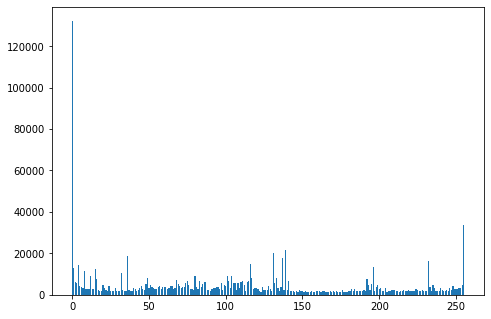

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x = range(256), height = byte_dict.values())
plt.show()

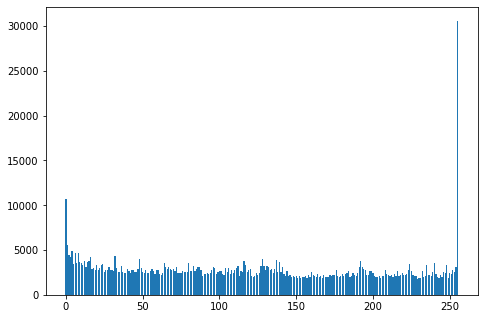

In [51]:
byte_packed_dict = countByte("/content/putty32_packed.exe")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x = range(256), height = byte_packed_dict.values())
plt.show()

Question: why? Can you do bi-gram or tri-gram? Need to considering sliding window or not? How many grams needed? Can you find a way to do feature selection on these grams so that we do not need to keep so many features?

### ASM

https://www.capstone-engine.org/lang_python.html

In [52]:
!pip install capstone

     |████████████████████████████████| 1.9MB 2.7MB/s 


In [53]:
import capstone
import pefile

pef = pefile.PE("/content/putty32.exe")
entryPoint = pef.OPTIONAL_HEADER.AddressOfEntryPoint
data = pef.get_memory_mapped_image()[entryPoint:]
cs = capstone.Cs(capstone.CS_ARCH_X86, capstone.CS_MODE_32)
for i in cs.disasm(data, 0x1000):
    print("0x%x:\t%s\t%s" %(i.address, i.mnemonic, i.op_str))

Streaming output truncated to the last 5000 lines.
0x1db17:	cmp	dword ptr [esp + 8], 0
0x1db1c:	jne	0x1dadc
0x1db1e:	fstp	st(0)
0x1db20:	fld	xword ptr [0x49d30a]
0x1db26:	mov	eax, 2
0x1db2b:	cmp	dword ptr [0x4bae24], 0
0x1db32:	jne	0x1e7c8
0x1db38:	lea	ecx, [0x49d1a0]
0x1db3e:	mov	edx, 0x1b
0x1db43:	call	0x1e8d1
0x1db48:	pop	edx
0x1db49:	ret	
0x1db4a:	cmp	dword ptr [0x4ba698], 0
0x1db51:	je	0x1db8a
0x1db53:	push	ebp
0x1db54:	mov	ebp, esp
0x1db56:	sub	esp, 8
0x1db59:	and	esp, 0xfffffff8
0x1db5c:	fstp	qword ptr [esp]
0x1db5f:	cvttsd2si	eax, qword ptr [esp]
0x1db64:	leave	
0x1db65:	ret	
0x1db66:	cmp	dword ptr [0x4ba698], 0
0x1db6d:	je	0x1db8a
0x1db6f:	sub	esp, 4
0x1db72:	fnstcw	word ptr [esp]
0x1db75:	pop	eax
0x1db76:	and	ax, 0x7f
0x1db7a:	cmp	ax, 0x7f
0x1db7e:	je	0x1db53
0x1db80:	lea	esp, [esp]
0x1db87:	lea	ecx, [ecx]
0x1db8a:	push	ebp
0x1db8b:	mov	ebp, esp
0x1db8d:	sub	esp, 0x20
0x1db90:	and	esp, 0xfffffff0
0x1db93:	fld	st(0)
0x1db95:	fst	dword ptr [esp + 0x18]
0x1db99:	fistp	qword ptr 

Note: we do not cover control-flow graph (CFG)!

## Fuzzy Hash

Get an older version.

In [54]:
!wget https://the.earth.li/~sgtatham/putty/0.72/w32/putty.exe -O putty32_old.exe

--2020-04-06 05:58:04--  https://the.earth.li/~sgtatham/putty/0.72/w32/putty.exe
Resolving the.earth.li (the.earth.li)... 93.93.131.124, 2a00:1098:86:4d:c0ff:ee:15:900d
Connecting to the.earth.li (the.earth.li)|93.93.131.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1098112 (1.0M) [application/x-msdos-program]
Saving to: ‘putty32_old.exe’

putty32_old.exe     100%[===================>]   1.05M   982KB/s    in 1.1s    

2020-04-06 05:58:06 (982 KB/s) - ‘putty32_old.exe’ saved [1098112/1098112]



In [55]:
!apt-get install ssdeep

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  ssdeep
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 29.0 kB of archives.
After this operation, 75.8 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 ssdeep amd64 2.14-1 [29.0 kB]
Fetched 29.0 kB in 0s (97.0 kB/s)
Selecting previously unselected package ssdeep.
(Reading database ... 133893 files and directories currently installed.)
Preparing to unpack .../ssdeep_2.14-1_amd64.deb ...
Unpacking ssdeep (2.14-1) ...
Setting up ssdeep (2.14-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [56]:
!ssdeep /content/putty32.exe

ssdeep,1.1--blocksize:hash:hash,filename
24576:HnYO/xJrstd2u3Slcfo259gy6Ym4ZrpdSdwwDtrm83zh:dbst4u3vA2PgTqpdSdvDtrm+zh,"/content/putty32.exe"


In [57]:
!ssdeep /content/putty32_old.exe

ssdeep,1.1--blocksize:hash:hash,filename
24576:wpPg/wTlg6Xklt9e/Y/iIpNh6liEmE2CebHNpVffB:XwRg6X+twii8N0oCeLNbfB,"/content/putty32_old.exe"


In [58]:
import hashlib
print(hashlib.md5(open("/content/putty32.exe", 'rb').read()).hexdigest())
print(hashlib.md5(open("/content/putty32_old.exe", 'rb').read()).hexdigest())

9052d06c6ac53471f8496263f8fef2eb
d9e402762e546c0046ad4748778472e1


In [59]:
# https://www.fireeye.com/blog/threat-research/2014/01/tracking-malware-import-hashing.html

print(pefile.PE("/content/putty32.exe").get_imphash())
print(pefile.PE("/content/putty32_old.exe").get_imphash())

d803cf4cabab38ad6ac8123e3c7a53dd
d803cf4cabab38ad6ac8123e3c7a53dd


Question: take a look at pefile's source code? What is imphash?

In [60]:
!ssdeep -pb *.exe

putty32.exe matches putty64.exe (41)

putty64.exe matches putty32.exe (41)



Note that python has "ssdeep", but it cannot install in colab directly. https://pypi.org/project/ssdeep/

In [0]:
!echo "This is a book" > b.txt

In [63]:
!ssdeep b.txt

ssdeep,1.1--blocksize:hash:hash,filename
3:hMCEwn:huw,"/content/b.txt"
ssdeep: Did not process files large enough to produce meaningful results


In [0]:
!echo "This is a book." > a.txt

In [65]:
!ssdeep a.txt

ssdeep,1.1--blocksize:hash:hash,filename
3:hMCE2:hu2,"/content/a.txt"
ssdeep: Did not process files large enough to produce meaningful results
